In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

In [3]:
schools_df = pd.read_csv("SAT__College_Board__2010_School_Level_Results.csv")
schools_df.head()

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN


In [4]:
schools_df.describe()

,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
count,386.000000,386.000000,386.000000,386.000000
mean,103.658031,404.248705,412.935233,397.689119
std,145.264496,56.815631,64.990976,57.762584
min,7.000000,291.000000,281.000000,285.000000
25%,35.000000,370.000000,372.000000,364.000000
50%,54.000000,392.500000,394.500000,383.000000
75%,92.750000,419.000000,429.750000,414.000000
max,1047.000000,674.000000,735.000000,678.000000


In [5]:
schools_df['Total SAT Means'] = schools_df['Critical Reading Mean'] + schools_df['Mathematics Mean'] + schools_df['Writing Mean']
schools_df

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean,Total SAT Means
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0,1201.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0,1200.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0,1251.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0,1133.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN,NaN
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0,1160.0
6,01M539,"New Explorations into Sci, Tech and Math HS",47.0,568.0,583.0,568.0,1719.0
7,01M650,CASCADES HIGH SCHOOL,35.0,411.0,401.0,401.0,1213.0
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,138.0,630.0,608.0,630.0,1868.0
9,02M047,AMERICAN SIGN LANG ENG DUAL,11.0,405.0,415.0,385.0,1205.0


In [6]:
schools_na = schools_df.dropna()
schools_na.head()

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean,Total SAT Means
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0,1201.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0,1200.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0,1251.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0,1133.0
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0,1160.0


In [7]:
schools_na.reset_index(drop=True, inplace=True)
schools_na

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean,Total SAT Means
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0,1201.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0,1200.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0,1251.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0,1133.0
4,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0,1160.0
5,01M539,"New Explorations into Sci, Tech and Math HS",47.0,568.0,583.0,568.0,1719.0
6,01M650,CASCADES HIGH SCHOOL,35.0,411.0,401.0,401.0,1213.0
7,01M696,BARD HIGH SCHOOL EARLY COLLEGE,138.0,630.0,608.0,630.0,1868.0
8,02M047,AMERICAN SIGN LANG ENG DUAL,11.0,405.0,415.0,385.0,1205.0
9,02M288,FOOD AND FNANCE HIGH SCHOOL,50.0,422.0,412.0,407.0,1241.0


In [8]:
schools_na.to_csv('modified.csv', index=False)

In [9]:
new_schools_df = pd.read_csv('modified.csv')
new_schools_df

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean,Total SAT Means
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0,1201.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0,1200.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0,1251.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0,1133.0
4,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0,1160.0
5,01M539,"New Explorations into Sci, Tech and Math HS",47.0,568.0,583.0,568.0,1719.0
6,01M650,CASCADES HIGH SCHOOL,35.0,411.0,401.0,401.0,1213.0
7,01M696,BARD HIGH SCHOOL EARLY COLLEGE,138.0,630.0,608.0,630.0,1868.0
8,02M047,AMERICAN SIGN LANG ENG DUAL,11.0,405.0,415.0,385.0,1205.0
9,02M288,FOOD AND FNANCE HIGH SCHOOL,50.0,422.0,412.0,407.0,1241.0


In [10]:
total_sat_means = new_schools_df[['School Name', 'Total SAT Means']]
total_sat_means

,School Name,Total SAT Means
0,Henry Street School for International Studies,1201.0
1,University Neighborhood High School,1200.0
2,East Side Community High School,1251.0
3,SATELLITE ACADEMY FORSYTH ST,1133.0
4,Lower East Side Preparatory High School,1160.0
5,"New Explorations into Sci, Tech and Math HS",1719.0
6,CASCADES HIGH SCHOOL,1213.0
7,BARD HIGH SCHOOL EARLY COLLEGE,1868.0
8,AMERICAN SIGN LANG ENG DUAL,1205.0
9,FOOD AND FNANCE HIGH SCHOOL,1241.0


In [11]:
top_total_schools = total_sat_means.sort_values('Total SAT Means', ascending=False)
top_total_schools

,School Name,Total SAT Means
38,STUYVESANT HIGH SCHOOL,2087.0
164,BRONX HIGH SCHOOL OF SCIENCE,1960.0
376,STATEN ISLAND TECHNICAL HIGH SCHOOL,1928.0
327,Townsend Harris High School at Queens College,1923.0
172,HS of American Studies at Lehman College,1884.0
349,QUEENS HS FOR SCIENCE YORK COL,1875.0
7,BARD HIGH SCHOOL EARLY COLLEGE,1868.0
211,BROOKLYN TECHNICAL HIGH SCHOOL,1821.0
91,High School For Math Science Engineering City ...,1794.0
24,New York City Laboratory School Collab Studies,1725.0


In [12]:
top_20_schools = top_total_schools.head(20).set_index('School Name')
top_20_schools

,Total SAT Means
School Name,
STUYVESANT HIGH SCHOOL,2087.0
BRONX HIGH SCHOOL OF SCIENCE,1960.0
STATEN ISLAND TECHNICAL HIGH SCHOOL,1928.0
Townsend Harris High School at Queens College,1923.0
HS of American Studies at Lehman College,1884.0
QUEENS HS FOR SCIENCE YORK COL,1875.0
BARD HIGH SCHOOL EARLY COLLEGE,1868.0
BROOKLYN TECHNICAL HIGH SCHOOL,1821.0
High School For Math Science Engineering City Coll,1794.0


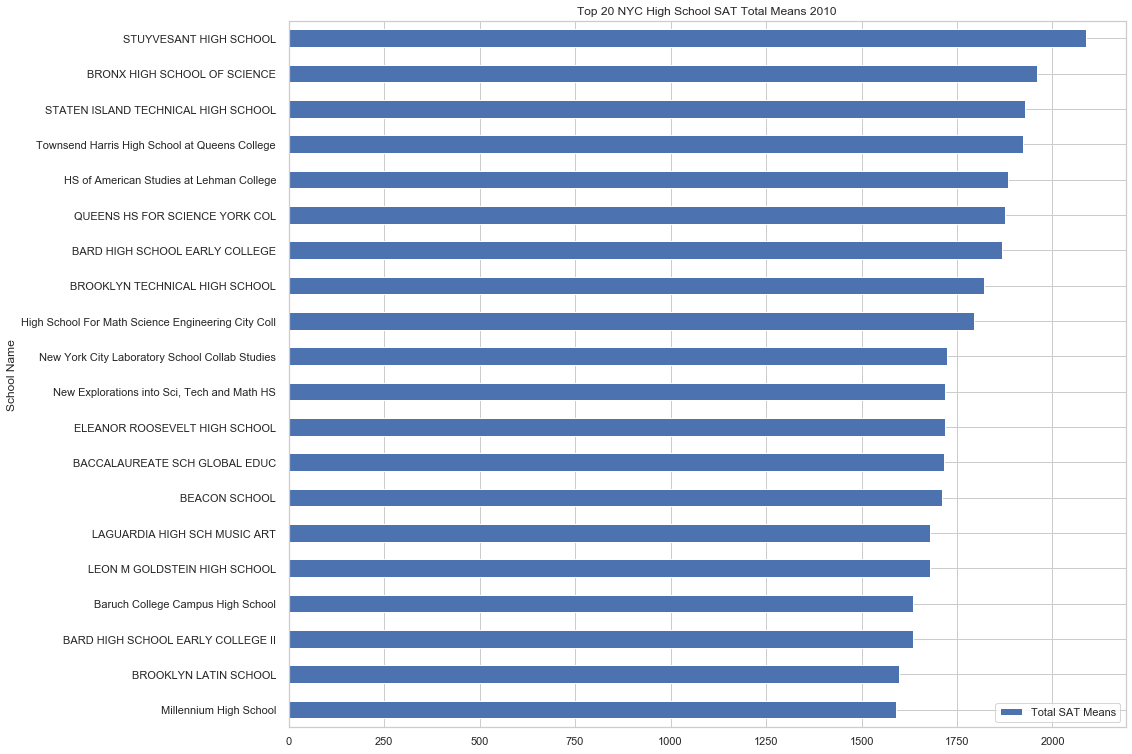

In [13]:
top_20_schools_plot = top_20_schools.plot(kind='barh', title="Top 20 NYC High School SAT Total Means 2010", figsize=(15,13)).invert_yaxis()

In [14]:
new_schools_df.head()

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean,Total SAT Means
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0,1201.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0,1200.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0,1251.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0,1133.0
4,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0,1160.0


In [15]:
new_schools_math_means = new_schools_df[['School Name', 'Mathematics Mean']]
new_schools_math_means.sort_values('Mathematics Mean', ascending=False)

,School Name,Mathematics Mean
38,STUYVESANT HIGH SCHOOL,735.0
164,BRONX HIGH SCHOOL OF SCIENCE,685.0
376,STATEN ISLAND TECHNICAL HIGH SCHOOL,673.0
211,BROOKLYN TECHNICAL HIGH SCHOOL,652.0
349,QUEENS HS FOR SCIENCE YORK COL,650.0
327,Townsend Harris High School at Queens College,644.0
172,HS of American Studies at Lehman College,630.0
91,High School For Math Science Engineering City ...,627.0
48,Dual Language and Asian Studies High School,612.0
7,BARD HIGH SCHOOL EARLY COLLEGE,608.0


In [16]:
math_schools = new_schools_math_means.loc[new_schools_math_means['School Name'].str.contains('math', flags=re.I, regex=True)]
top_math_schools = math_schools.sort_values('Mathematics Mean', ascending=False)
top_math_schools['Schools with keyword "Math"'] = True
top_math_schools_group = top_math_schools
top_math_schools_group

,School Name,Mathematics Mean,"Schools with keyword ""Math"""
91,High School For Math Science Engineering City ...,627.0,True
5,"New Explorations into Sci, Tech and Math HS",583.0,True
77,Manhattan Center for Science and Math,531.0,True
133,Bronx Center for Science and Mathematics,495.0,True
178,Columbus Institute for Math and Science,464.0,True
357,MATH SCIENCE RESEARCH TECH MAG,430.0,True


In [17]:
non_math_schools = new_schools_math_means.loc[~new_schools_math_means['School Name'].str.contains('math', flags=re.I, regex=True)]
top_non_math_schools = non_math_schools.sort_values('Mathematics Mean', ascending=False)
top_non_math_schools['Schools with keyword "Math"'] = False
top_non_math_schools_group = top_non_math_schools
top_6_non_math_schools_group = top_non_math_schools.head(6)
top_6_non_math_schools_group

,School Name,Mathematics Mean,"Schools with keyword ""Math"""
38,STUYVESANT HIGH SCHOOL,735.0,False
164,BRONX HIGH SCHOOL OF SCIENCE,685.0,False
376,STATEN ISLAND TECHNICAL HIGH SCHOOL,673.0,False
211,BROOKLYN TECHNICAL HIGH SCHOOL,652.0,False
349,QUEENS HS FOR SCIENCE YORK COL,650.0,False
327,Townsend Harris High School at Queens College,644.0,False


In [18]:
math_nonMath_schools = pd.concat([top_math_schools_group, top_6_non_math_schools_group], axis=0, ignore_index=False)
math_nonMath_schools.reset_index(inplace=True)
top_math_vs_nonMath_schools = math_nonMath_schools.sort_values("Mathematics Mean", ascending=False)
top_math_vs_nonMath_schools

,index,School Name,Mathematics Mean,"Schools with keyword ""Math"""
6,38,STUYVESANT HIGH SCHOOL,735.0,False
7,164,BRONX HIGH SCHOOL OF SCIENCE,685.0,False
8,376,STATEN ISLAND TECHNICAL HIGH SCHOOL,673.0,False
9,211,BROOKLYN TECHNICAL HIGH SCHOOL,652.0,False
10,349,QUEENS HS FOR SCIENCE YORK COL,650.0,False
11,327,Townsend Harris High School at Queens College,644.0,False
0,91,High School For Math Science Engineering City ...,627.0,True
1,5,"New Explorations into Sci, Tech and Math HS",583.0,True
2,77,Manhattan Center for Science and Math,531.0,True
3,133,Bronx Center for Science and Mathematics,495.0,True


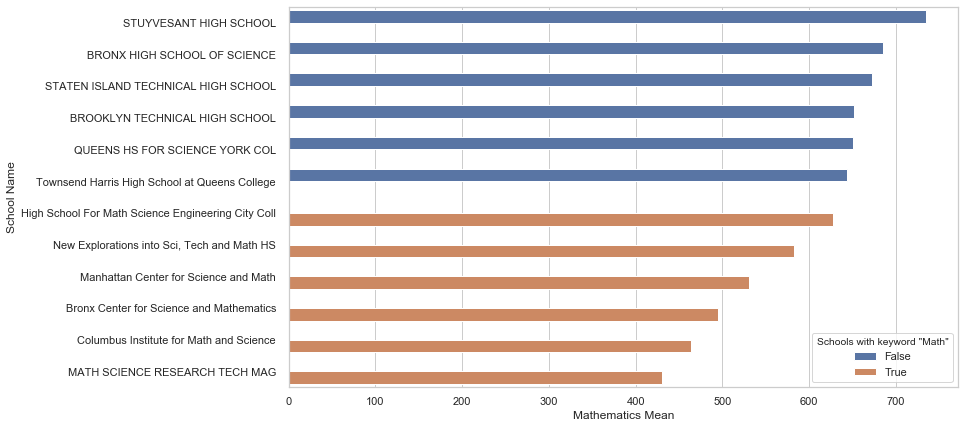

In [19]:
math_nonMath_schools_plot = sns.barplot(x='Mathematics Mean', y='School Name', hue='Schools with keyword "Math"', data=top_math_vs_nonMath_schools)
math_nonMath_schools_plot